<a href="https://colab.research.google.com/github/eceyucesoy/Sales-Fact/blob/main/question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
data = pd.read_csv('salesFact.csv')

In [ ]:
continousClusteringData = data[['TotalDrinkSales','TotalFoodSales','TotalNonConSales']]
display(continousClusteringData)

,TotalDrinkSales,TotalFoodSales,TotalNonConSales
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,15.34,124.01,63.82
3,0.00,0.00,0.00
4,0.00,1.08,0.00
...,...,...,...
10276,36.70,81.17,112.47
10277,5.98,112.09,49.17
10278,0.00,0.00,0.00
10279,12.92,164.98,54.87


In [ ]:
from sklearn.preprocessing import StandardScaler
continous_scaled = StandardScaler().fit_transform(continousClusteringData)
display(continous_scaled)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=50)
model.fit(continous_scaled)
print(model.labels_)

array([[-0.64233006, -0.72704594, -0.69111991],
       [-0.64233006, -0.72704594, -0.69111991],
       [ 0.06817196,  0.05375531,  0.75012362],
       ...,
       [-0.64233006, -0.72704594, -0.69111991],
       [-0.04391506,  0.31171376,  0.54800627],
       [ 2.26174275,  0.21084741,  0.10470306]])

KMeans(max_iter=50, n_clusters=3)

[0 0 2 ... 0 2 2]


In [ ]:
continousClusteringData['label'] = model.labels_
# cluster sizes
print(continousClusteringData['label'].value_counts())

display(continousClusteringData)

print(f"Cluster centroid values:\n{model.cluster_centers_}")

print(continousClusteringData['label'].value_counts())

0    7942
2    1867
1     472
Name: label, dtype: int64


<ipython-input-4-9d8ae22a551a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continousClusteringData['label'] = model.labels_


,TotalDrinkSales,TotalFoodSales,TotalNonConSales,label
0,0.00,0.00,0.00,0
1,0.00,0.00,0.00,0
2,15.34,124.01,63.82,2
3,0.00,0.00,0.00,0
4,0.00,1.08,0.00,0
...,...,...,...,...
10276,36.70,81.17,112.47,2
10277,5.98,112.09,49.17,0
10278,0.00,0.00,0.00,0
10279,12.92,164.98,54.87,2


Cluster centroid values:
[[-0.38429064 -0.3958475  -0.39525521]
 [ 3.17308959  3.3853588   3.3099401 ]
 [ 0.82669474  0.82215823  0.8386289 ]]
0    7942
2    1867
1     472
Name: label, dtype: int64


In [ ]:
clusterCenters = pd.DataFrame(data = model.cluster_centers_, columns = data[['TotalDrinkSales','TotalFoodSales','TotalNonConSales']].columns)
display(clusterCenters)

,TotalDrinkSales,TotalFoodSales,TotalNonConSales
0,-0.384291,-0.395847,-0.395255
1,3.173090,3.385359,3.309940
2,0.826695,0.822158,0.838629


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faae346abe0>,
      dtype=object)

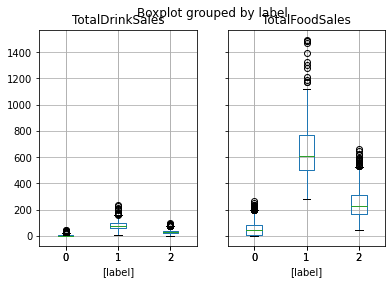

In [ ]:
continousClusteringData.boxplot(column=['TotalDrinkSales', 'TotalFoodSales'], by=['label'])

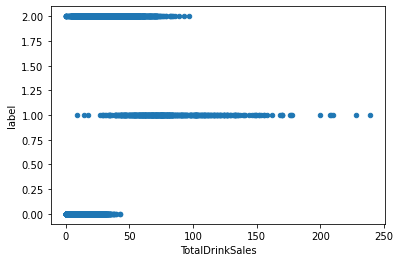

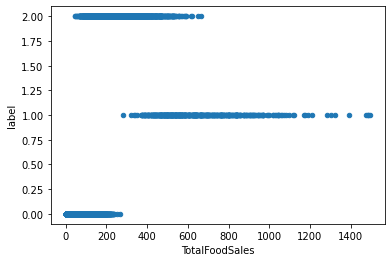

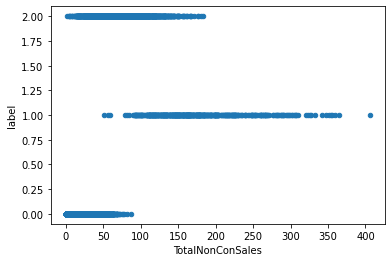

In [ ]:
continousClusteringData.plot.scatter(x='TotalDrinkSales', y='label')
continousClusteringData.plot.scatter(x='TotalFoodSales', y='label')
continousClusteringData.plot.scatter(x='TotalNonConSales', y='label')

In [ ]:
display(pd.crosstab(data['gender'], continousClusteringData['label'], rownames=['gender'], colnames=['label']))
display(pd.crosstab(data['yearly_income'], continousClusteringData['label'], rownames=['yearly_income'], colnames=['label']))
display(pd.crosstab(data['marital_status'], continousClusteringData['label'], rownames=['marital_status'], colnames=['label']))
display(pd.crosstab(data['member_card'], continousClusteringData['label'], rownames=['member_card'], colnames=['label']))

label,0,1,2
gender,,,
F,3932,253,912
M,4010,219,955


label,0,1,2
yearly_income,,,
$10K - $30K,1706,98,418
$110K - $130K,387,17,89
$130K - $150K,376,32,98
$150K +,179,11,33
$30K - $50K,2561,156,610
$50K - $70K,1457,73,315
$70K - $90K,920,64,223
$90K - $110K,356,21,81


label,0,1,2
marital_status,,,
M,3994,242,906
S,3948,230,961


label,0,1,2
member_card,,,
Bronze,4405,264,1034
Golden,902,72,224
Normal,1866,101,453
Silver,769,35,156


In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# PAM
model = KMedoids(n_clusters=3, method='pam')
model.fit(continous_scaled)
print("\nModel Cluster centers")
print(model.cluster_centers_)

# Print the assigned cluster ids for each data point
print("\nModel Cluster labels")
print(model.labels_)

KMedoids(method='pam', n_clusters=3)


Model Cluster centers
[[ 1.61886347  1.80393129  1.87701256]
 [-0.59045507 -0.62951662 -0.6059822 ]
 [ 0.0297289  -0.00914449 -0.03214958]]

Model Cluster labels
[1 1 2 ... 1 2 2]


In [ ]:
# a hierarchical agglomerative method - dendogram
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
dend = shc.dendrogram(shc.linkage(continous_scaled, method="complete"))
dend

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, linkage="complete")

model.fit(continous_scaled)
continousClusteringData['label_hier4'] = model.labels_

model = AgglomerativeClustering(n_clusters=5, linkage="complete")

model.fit(continous_scaled)
continousClusteringData['label_hier5'] = model.labels_

display(continousClusteringData.columns)

# Display hierarchical clustering results of 4-cluster & 5-cluster
display(continousClusteringData[['label_hier4', 'label_hier5']])

# Compare hierarchical clustering results of 4-cluster - 5-cluster
pd.crosstab(continousClusteringData['label_hier4'], continousClusteringData['label_hier5'], rownames=['label_hier4'], colnames=['label_hier5'])




AgglomerativeClustering(linkage='complete', n_clusters=4)

<ipython-input-14-dd30951c7525>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continousClusteringData['label_hier4'] = model.labels_


AgglomerativeClustering(linkage='complete', n_clusters=5)

<ipython-input-14-dd30951c7525>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continousClusteringData['label_hier5'] = model.labels_


Index(['TotalDrinkSales', 'TotalFoodSales', 'TotalNonConSales', 'label',
       'label_hier4', 'label_hier5'],
      dtype='object')

,label_hier4,label_hier5
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
10276,2,0
10277,2,0
10278,2,0
10279,2,0


label_hier5,0,1,2,3,4
label_hier4,,,,,
0,0,0,81,0,119
1,0,72,0,0,0
2,10004,0,0,0,0
3,0,0,0,5,0


In [ ]:
# density based method DBSCAN
from sklearn.cluster import DBSCAN

# Create the model with 0.5 eps (epsilon neighbourhood - radius) and 5 minimum samples
# min_samples is the number of samples in a neighbourhood to be considered a core point
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(continous_scaled)

# Assign computed clusters for each data point to a new attribute in the original data
continousClusteringData['label_dbscan1'] = model.labels_

print(continousClusteringData['label_dbscan1'].value_counts())

continousClusteringData['label_dbscan1']


DBSCAN()

 0    10073
-1      183
 3        8
 2        6
 1        6
 4        5
Name: label_dbscan1, dtype: int64


<ipython-input-15-78c6032766c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continousClusteringData['label_dbscan1'] = model.labels_


0        0
1        0
2        0
3        0
4        0
        ..
10276    0
10277    0
10278    0
10279    0
10280    0
Name: label_dbscan1, Length: 10281, dtype: int64

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faadfb95370>,
                 estimator=KMeans(n_clusters=9), k=(1, 10))

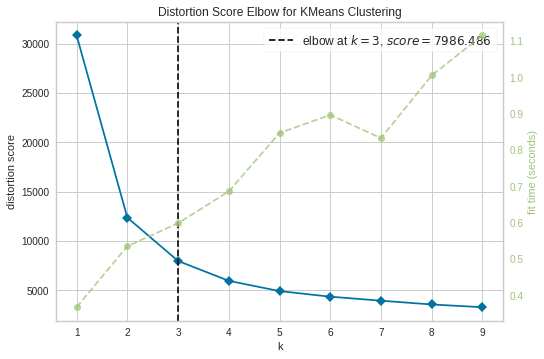

In [ ]:
# number of cluster of kMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(continous_scaled)
visualizer.show()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faadb1a79a0>,
                 estimator=KMedoids(n_clusters=9), k=(1, 10))

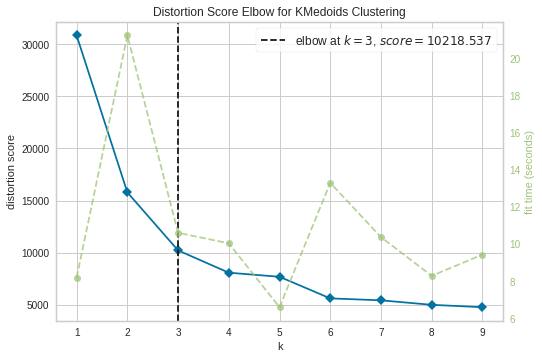

In [ ]:
# number of cluster of kMedoids
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(continous_scaled)
visualizer.show()


In [ ]:
# Interpret the resulting clusters and profiles comparing results of different algorithms.

display(continousClusteringData.columns)

display(pd.crosstab(data['gender'], continousClusteringData['label'], rownames=['gender'], colnames=['label']))
display(pd.crosstab(data['gender'], continousClusteringData['label_dbscan1'], rownames=['gender'], colnames=['label_dbscan1']))
display(pd.crosstab(data['gender'], continousClusteringData['label_hier4'], rownames=['gender'], colnames=['label_hier4']))
display(pd.crosstab(data['gender'], continousClusteringData['label_hier5'], rownames=['gender'], colnames=['label_hier5']))


display(pd.crosstab(data['marital_status'], continousClusteringData['label'], rownames=['marital_status'], colnames=['label']))
display(pd.crosstab(data['marital_status'], continousClusteringData['label_dbscan1'], rownames=['marital_status'], colnames=['label_dbscan1']))
display(pd.crosstab(data['marital_status'], continousClusteringData['label_hier4'], rownames=['marital_status'], colnames=['label_hier4']))
display(pd.crosstab(data['marital_status'], continousClusteringData['label_hier5'], rownames=['marital_status'], colnames=['label_hier5']))

display(pd.crosstab(data['yearly_income'], continousClusteringData['label'], rownames=['yearly_income'], colnames=['label']))
display(pd.crosstab(data['yearly_income'], continousClusteringData['label_dbscan1'], rownames=['yearly_income'], colnames=['label_dbscan1']))
display(pd.crosstab(data['yearly_income'], continousClusteringData['label_hier4'], rownames=['yearly_income'], colnames=['label_hier4']))
display(pd.crosstab(data['yearly_income'], continousClusteringData['label_hier5'], rownames=['yearly_income'], colnames=['label_hier5']))

display(pd.crosstab(data['total_children'], continousClusteringData['label'], rownames=['total_children'], colnames=['label']))
display(pd.crosstab(data['total_children'], continousClusteringData['label_dbscan1'], rownames=['total_children'], colnames=['label_dbscan1']))
display(pd.crosstab(data['total_children'], continousClusteringData['label_hier4'], rownames=['total_children'], colnames=['label_hier4']))
display(pd.crosstab(data['total_children'], continousClusteringData['label_hier5'], rownames=['total_children'], colnames=['label_hier5']))

display(pd.crosstab(data['education'], continousClusteringData['label'], rownames=['education'], colnames=['label']))
display(pd.crosstab(data['education'], continousClusteringData['label_dbscan1'], rownames=['education'], colnames=['label_dbscan1']))
display(pd.crosstab(data['education'], continousClusteringData['label_hier4'], rownames=['education'], colnames=['label_hier4']))
display(pd.crosstab(data['education'], continousClusteringData['label_hier5'], rownames=['education'], colnames=['label_hier5']))



Index(['TotalDrinkSales', 'TotalFoodSales', 'TotalNonConSales', 'label',
       'label_hier4', 'label_hier5', 'label_dbscan1'],
      dtype='object')

label,0,1,2
gender,,,
F,3932,253,912
M,4010,219,955


label_dbscan1,-1,0,1,2,3,4
gender,,,,,,
F,96,4984,5,4,5,3
M,87,5089,1,2,3,2


label_hier4,0,1,2,3
gender,,,,
F,111,40,4943,3
M,89,32,5061,2


label_hier5,0,1,2,3,4
gender,,,,,
F,4943,40,48,3,63
M,5061,32,33,2,56


label,0,1,2
marital_status,,,
M,3994,242,906
S,3948,230,961


label_dbscan1,-1,0,1,2,3,4
marital_status,,,,,,
M,102,5030,2,3,3,2
S,81,5043,4,3,5,3


label_hier4,0,1,2,3
marital_status,,,,
M,108,39,4993,2
S,92,33,5011,3


label_hier5,0,1,2,3,4
marital_status,,,,,
M,4993,39,43,2,65
S,5011,33,38,3,54


label,0,1,2
yearly_income,,,
$10K - $30K,1706,98,418
$110K - $130K,387,17,89
$130K - $150K,376,32,98
$150K +,179,11,33
$30K - $50K,2561,156,610
$50K - $70K,1457,73,315
$70K - $90K,920,64,223
$90K - $110K,356,21,81


label_dbscan1,-1,0,1,2,3,4
yearly_income,,,,,,
$10K - $30K,33,2185,0,2,0,2
$110K - $130K,3,486,0,1,2,1
$130K - $150K,16,489,0,0,1,0
$150K +,2,221,0,0,0,0
$30K - $50K,70,3250,2,2,2,1
$50K - $70K,29,1814,1,0,0,1
$70K - $90K,21,1180,3,1,2,0
$90K - $110K,9,448,0,0,1,0


label_hier4,0,1,2,3
yearly_income,,,,
$10K - $30K,41,11,2170,0
$110K - $130K,7,2,484,0
$130K - $150K,14,9,483,0
$150K +,6,1,216,0
$30K - $50K,72,23,3227,5
$50K - $70K,25,8,1812,0
$70K - $90K,27,14,1166,0
$90K - $110K,8,4,446,0


label_hier5,0,1,2,3,4
yearly_income,,,,,
$10K - $30K,2170,11,18,0,23
$110K - $130K,484,2,3,0,4
$130K - $150K,483,9,5,0,9
$150K +,216,1,1,0,5
$30K - $50K,3227,23,31,5,41
$50K - $70K,1812,8,9,0,16
$70K - $90K,1166,14,11,0,16
$90K - $110K,446,4,3,0,5


label,0,1,2
total_children,,,
0,836,36,166
1,1592,73,360
2,1599,88,381
3,1590,101,368
4,1563,109,391
5,762,65,201


label_dbscan1,-1,0,1,2,3,4
total_children,,,,,,
0,12,1024,2,0,0,0
1,21,2001,0,0,2,1
2,32,2031,1,2,1,1
3,37,2016,2,2,2,0
4,51,2004,1,1,3,3
5,30,997,0,1,0,0


label_hier4,0,1,2,3
total_children,,,,
0,15,4,1018,1
1,29,11,1985,0
2,37,14,2016,1
3,41,12,2004,2
4,48,18,1996,1
5,30,13,985,0


label_hier5,0,1,2,3,4
total_children,,,,,
0,1018,4,7,1,8
1,1985,11,10,0,19
2,2016,14,14,1,23
3,2004,12,18,2,23
4,1996,18,18,1,30
5,985,13,14,0,16


label,0,1,2
education,,,
Bachelors Degree,2027,121,471
Graduate Degree,414,20,105
High School Degree,2341,146,552
Partial College,774,38,178
Partial High School,2386,147,561


label_dbscan1,-1,0,1,2,3,4
education,,,,,,
Bachelors Degree,45,2568,2,0,3,1
Graduate Degree,5,529,2,0,3,0
High School Degree,63,2972,1,1,1,1
Partial College,16,974,0,0,0,0
Partial High School,54,3030,1,5,1,3


label_hier4,0,1,2,3
education,,,,
Bachelors Degree,50,20,2549,0
Graduate Degree,5,7,527,0
High School Degree,62,19,2955,3
Partial College,16,5,967,2
Partial High School,67,21,3006,0


label_hier5,0,1,2,3,4
education,,,,,
Bachelors Degree,2549,20,19,0,31
Graduate Degree,527,7,3,0,2
High School Degree,2955,19,26,3,36
Partial College,967,5,5,2,11
Partial High School,3006,21,28,0,39
